# Eluvio Data Science Challenge


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## open data file

In [2]:
data = pd.read_csv('Eluvio_DS_Challenge.csv')

In [3]:
data

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


### They look like Reddit posts! 

## Let's explore each feature one at a time

### time_created 

In [64]:
#convert to UTC
from datetime import datetime

#just the time, date will be in the next feature
creation_times = np.array([datetime.utcfromtimestamp(time_created).time().hour for time_created in data['time_created']])


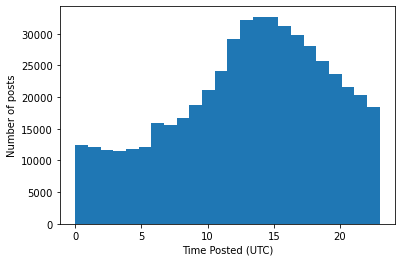

In [80]:
plt.hist(creation_times, bins=24)
plt.xlabel('Time Posted (UTC)')
plt.ylabel('Number of posts')
plt.show()

### date_created 

In [85]:
creation_dates = np.array([datetime.utcfromtimestamp(time_created) for time_created in data['time_created']])


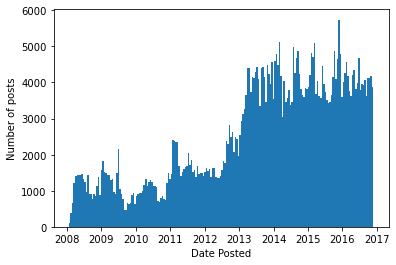

In [90]:
plt.hist(creation_dates, bins=200)
plt.xlabel('Date Posted')
plt.ylabel('Number of posts')
plt.show()

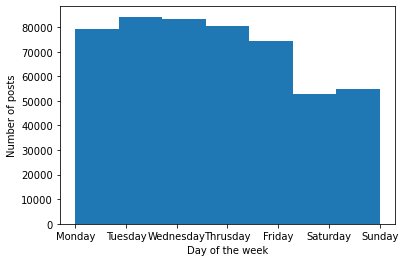

In [102]:
plt.hist([date.weekday() for date in creation_dates], bins=7)
plt.xlabel('Day of the week')
plt.ylabel('Number of posts')
plt.xticks(ticks=range(7),labels=['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'])
plt.show()

### up / down votes 

In [126]:
data.sort_values('up_votes',ascending=False)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
377200,1434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews
391415,1440421079,2015-08-24,13435,0,Twitter has forced 30 websites that archive po...,False,joeyoungblood,worldnews
450818,1459706506,2016-04-03,13244,0,2.6 terabyte leak of Panamanian shell company ...,False,mister_geaux,worldnews
391318,1440367768,2015-08-23,12333,0,The police officer who leaked the footage of t...,False,navysealassulter,worldnews
390252,1439939168,2015-08-18,11288,0,Paris shooting survivor suing French media for...,False,seapiglet,worldnews
...,...,...,...,...,...,...,...,...
220099,1381644882,2013-10-13,0,0,Chinese Premier Li Keqiang has been granted th...,False,davidreiss666,worldnews
431262,1453107414,2016-01-18,0,0,Taliban denies role in latest Afghanistan bombing,False,raziinuaq,worldnews
220101,1381645228,2013-10-13,0,0,Possible lead in Madeleine McCann case,False,CristabelYYC,worldnews
431259,1453107145,2016-01-18,0,0,Suicide Attack Kills at Least 13 in Afghanistan,False,middleeastnewsman,worldnews


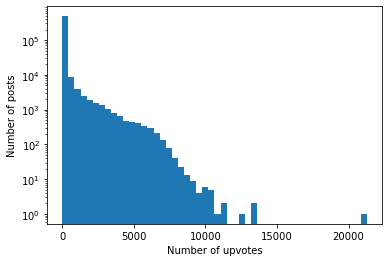

In [134]:
plt.hist(data['up_votes'], bins =50)
plt.semilogy()
plt.xlabel('Number of upvotes')
plt.ylabel('Number of posts')
plt.show()

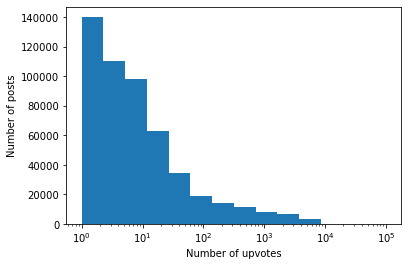

In [70]:
plt.hist(data['up_votes']+1, bins =np.logspace(0,5,15))
# plt.loglog()
plt.semilogx()
plt.xlabel('Number of upvotes')
plt.ylabel('Number of posts')
plt.show()

all `down_votes` are `0`. not a useful feature

### NSFW 

In [27]:
nsfw_mask = data['over_18'] == True

data[nsfw_mask]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
1885,1206381438,2008-03-24,189,0,Pics from the Tibetan protests - more graphic ...,True,pressed,worldnews
6721,1211138718,2008-05-18,5,0,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",True,alllie,worldnews
8414,1212694925,2008-06-05,0,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch,worldnews
12163,1216672016,2008-07-21,0,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch,worldnews
12699,1217381380,2008-07-30,5,0,IDF kills young Palestinian boy. Potentially N...,True,cup,worldnews
...,...,...,...,...,...,...,...,...
503776,1477889966,2016-10-31,4,0,Latest Italian Earthquake Devastates Medieval ...,True,pixelinthe,worldnews
508067,1479400229,2016-11-17,12,0,ISIS Release Video Showing Melbourne As A Poss...,True,halacska,worldnews
508176,1479434681,2016-11-18,0,0,Animal welfare activists have released footage...,True,NinjaDiscoJesus,worldnews
508376,1479492875,2016-11-18,6,0,Jungle Justice : Public lynching of a street ...,True,avivi_,worldnews


In [104]:
n_NSFW = len(data[nsfw_mask])
percent_NSFW = round(100*n_NSFW/len(data), 2)

print('{0}% of posts are NSFW'.format(percent_NSFW) )

0.06% of posts are NSFW


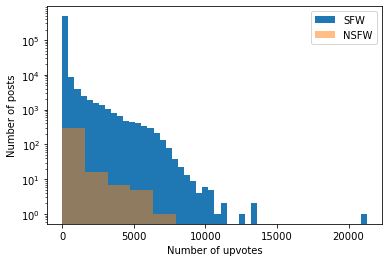

In [142]:
plt.hist(data['up_votes'][~nsfw_mask], bins =50, label='SFW')
plt.hist(data['up_votes'][nsfw_mask], bins =5, alpha=0.5, label='NSFW')

plt.semilogy()
plt.xlabel('Number of upvotes')
plt.ylabel('Number of posts')
plt.legend()
plt.show()

#### create random subsamples of SFW to see if distributions are distinct 

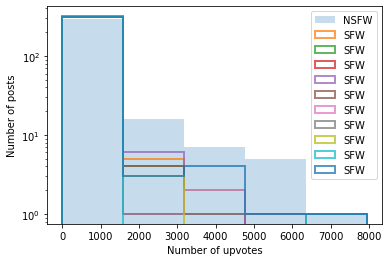

In [162]:
random_subsamples = [np.random.choice(data['up_votes'][~nsfw_mask].values, size = len(data['up_votes'][nsfw_mask])) for i in range(10)]                    

_, bins, _ = plt.hist(data['up_votes'][nsfw_mask], bins =5, label='NSFW', alpha=0.25)
for subsample in random_subsamples:
    plt.hist(subsample, bins =bins, alpha=0.75, label='SFW', histtype='step', linewidth=2)

plt.semilogy()
plt.xlabel('Number of upvotes')
plt.ylabel('Number of posts')
plt.legend()
plt.show()

at first glance, NSFW distribution seems to be distinct from SFW one. NSFW posts seem to receive more upvotes, but there are no NSFW posts with >8000 upvotes, possibly because of smaller sample. first bin contains most of the posts.

feature could provide info, but given such small number, it probably won't be useful.

### author 

In [281]:
data['author']

0                 polar
1                 polar
2                 polar
3               fadi420
4              mhermans
              ...      
509231    nonamenoglory
509232        SummerRay
509233        AUSharjah
509234      smilyflower
509235       superislam
Name: author, Length: 509236, dtype: object

In [286]:
data['author'].value_counts()

davidreiss666    8897
anutensil        5730
DoremusJessup    5037
maxwellhill      4023
igeldard         4013
                 ... 
Yeahchalmers        1
a_large_rock        1
sdnil               1
11milo11            1
ahsareraeraa        1
Name: author, Length: 85838, dtype: int64

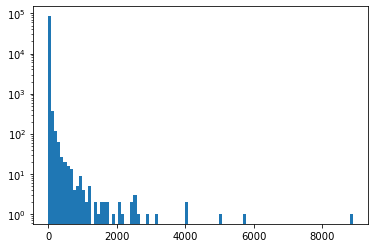

In [261]:
plt.hist(data['author'].value_counts(), bins=100)
plt.semilogy()
plt.show()

In [279]:
data.groupby('author', sort=False).mean()['up_votes']

author
polar               23.020000
fadi420              0.500000
mhermans             4.000000
Armagedonovich       9.000000
Clythos              4.666667
                      ...    
moodyno              0.000000
nanisa               2.000000
calfellow            3.000000
Randiathrowaway1     0.000000
SummerRay            1.000000
Name: up_votes, Length: 85838, dtype: float64

In [307]:
author_upvotes_counts = pd.concat([data.groupby('author', sort=False).mean()['up_votes'], data.groupby('author', sort=False).std()['up_votes'],data['author'].value_counts()], axis=1, keys=['mean_upvotes', 'std_upvotes','post_count'])


In [308]:
author_upvotes_counts

,mean_upvotes,std_upvotes,post_count
polar,23.020000,89.754197,50
fadi420,0.500000,0.707107,2
mhermans,4.000000,NaN,1
Armagedonovich,9.000000,8.485281,2
Clythos,4.666667,1.861899,6
...,...,...,...
moodyno,0.000000,NaN,1
nanisa,2.000000,NaN,1
calfellow,3.000000,NaN,1
Randiathrowaway1,0.000000,NaN,1


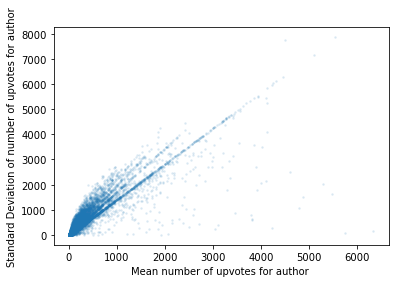

In [310]:
plt.scatter(author_upvotes_counts['mean_upvotes'],author_upvotes_counts['std_upvotes'],marker='.',s=10, alpha=0.1)
# plt.loglog()
plt.xlabel('Mean number of upvotes for author ')
plt.ylabel('Standard Deviation of number of upvotes for author')
plt.show()

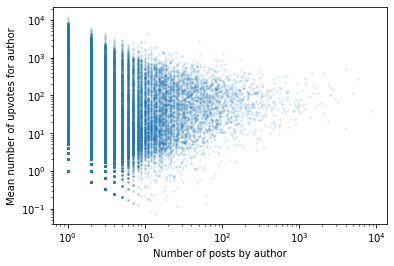

In [300]:
plt.scatter(author_upvotes_counts['mean_upvotes'],author_upvotes_counts['std_upvotes'],marker='.',s=10, alpha=0.1)
plt.loglog()
plt.xlabel('Number of posts by author')
plt.ylabel('Mean number of upvotes for author')
plt.show()

### category 

In [107]:
worldnews_mask = data['category'] == 'worldnews'

data[~worldnews_mask]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category


unhelpful feature. all posts are in `worldnews` category

### title 

In [224]:
import nltk, collections, re, string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')

data['title']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fardila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                         Scores killed in Pakistan clashes
1                          Japan resumes refuelling mission
2                           US presses Egypt on Gaza border
3              Jump-start economy: Give health care to all 
4           Council of Europe bashes EU&UN terror blacklist
                                ...                        
509231     Heil Trump : Donald Trump s  alt-right  white...
509232    There are people speculating that this could b...
509233            Professor receives Arab Researchers Award
509234    Nigel Farage attacks response to Trump ambassa...
509235    Palestinian wielding knife shot dead in West B...
Name: title, Length: 509236, dtype: object

In [206]:
all_text = ' '.join(data['title'].values).lower()

In [207]:
pattern = r"[{}]".format(string.punctuation)

all_text = re.sub(pattern, "", all_text)


In [209]:
all_words_list = all_text.split()

In [221]:
stop_words = [re.sub(pattern, "", stop) for stop in stopwords.words('english')]

words_list_no_stops = [word for word in all_words_list if word not in stop_words]

In [226]:
ss = SnowballStemmer('english')

stemmed_text = [ss.stem(word) for word in words_list_no_stops]

In [229]:
counter = collections.Counter(stemmed_text)

In [230]:
counter.most_common(50)

[('us', 39411),
 ('say', 34426),
 ('kill', 28727),
 ('china', 25726),
 ('new', 23321),
 ('attack', 22428),
 ('syria', 18767),
 ('russia', 18096),
 ('world', 17962),
 ('polic', 16670),
 ('year', 16583),
 ('protest', 16453),
 ('govern', 16436),
 ('state', 16262),
 ('report', 15736),
 ('iran', 15477),
 ('israel', 15456),
 ('presid', 15292),
 ('peopl', 13974),
 ('forc', 13126),
 ('countri', 12826),
 ('war', 12780),
 ('russian', 12417),
 ('un', 12404),
 ('uk', 12092),
 ('minist', 11847),
 ('militari', 11689),
 ('leader', 11540),
 ('korea', 11376),
 ('call', 11337),
 ('offici', 11286),
 ('north', 11286),
 ('south', 11277),
 ('news', 11246),
 ('syrian', 10904),
 ('said', 10714),
 ('dead', 10687),
 ('india', 10624),
 ('first', 10450),
 ('ukrain', 10322),
 ('death', 10282),
 ('use', 9982),
 ('two', 9867),
 ('plan', 9865),
 ('nuclear', 9793),
 ('isra', 9717),
 ('arrest', 9678),
 ('bomb', 9098),
 ('nation', 9008),
 ('group', 8996)]

In [311]:
counter

Counter({'score': 642,
         'kill': 28727,
         'pakistan': 8228,
         'clash': 3475,
         'japan': 8544,
         'resum': 760,
         'refuel': 44,
         'mission': 1782,
         'us': 39411,
         'press': 1899,
         'egypt': 8242,
         'gaza': 6375,
         'border': 5940,
         'jumpstart': 12,
         'economi': 2819,
         'give': 3650,
         'health': 2554,
         'care': 831,
         'council': 2149,
         'europ': 5818,
         'bash': 89,
         'euun': 3,
         'terror': 5786,
         'blacklist': 274,
         'hay': 28,
         'presto': 1,
         'farmer': 1022,
         'unveil': 1006,
         'illeg': 2747,
         'mocktudor': 1,
         'castl': 91,
         'tri': 4200,
         'hide': 589,
         'behind': 2098,
         '40ft': 3,
         'bale': 18,
         'strike': 7883,
         'protest': 16453,
         'gridlock': 30,
         'polandukrain': 1,
         'un': 12404,
         'mismanag': 53

### title length 

In [234]:
data['title'].values[0].split()

['Scores', 'killed', 'in', 'Pakistan', 'clashes']

In [235]:
title_lengths = [len(title.split()) for title in data['title'].values]

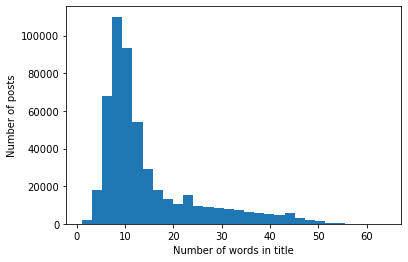

In [240]:
plt.hist(title_lengths, bins=30)
plt.xlabel('Number of words in title')
plt.ylabel('Number of posts')
plt.show()

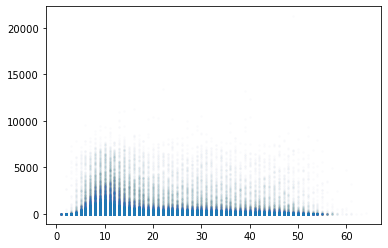

In [260]:
plt.scatter(title_lengths, data['up_votes'],marker='.',s=10, alpha=0.01)
plt.show()

## Summary 

informative features:
- `time_created`
- `up_votes`
- `title`
- `author`

additional features:
- `day_of_the_week`
- `title_length`